## get data

In [5]:
directory = 'Z:/Reed/Projects/micro_consortia/DARPA_biocon/Task 1.1/A=B/20190214 A=B mar cfp yfp small screen 1/'

filename = '20190214 A=B mar 1.xlsx'

In [6]:
dd = pd.read_excel(directory + filename, sheet_name=None)

In [7]:
dd.keys()

odict_keys(['OD700_raw', 'CFP_raw', 'YFP_raw', 'OD700', 'CFP', 'YFP', 'OD700_tidy', 'CFP_tidy', 'YFP_tidy', 'dense_norm_rcntr_fluorfrac', 'IDs', 'Exp'])

In [8]:
sheets_to_plot = [x for x in dd.keys() if 'tidy' in x]

In [9]:
sheets_to_plot

['OD700_tidy', 'CFP_tidy', 'YFP_tidy']

## make relevant indices

In [10]:
#which data are we plotting
data_sheet = sheets_to_plot[-1]
data = dd['dense_norm_rcntr_fluorfrac']

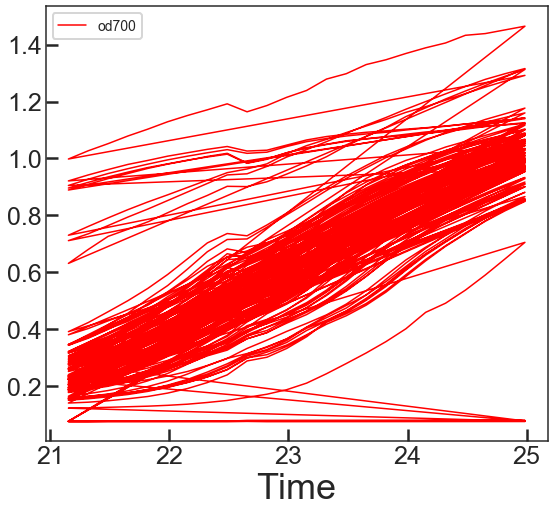

In [47]:
t1 = 21
t2 = 25
zz = data.loc[(data['Time'] < t2) & (data['Time'] > t1)].plot(x='Time', y='od700')

In [66]:
lb = data['a'] == 'lb'
ctrl = data['a'] == 'ctrl'

In [107]:
gg = data.loc[(data['Time'] < 18) & ~lb & ~ctrl]
for well in gg['well'].unique():
    target = 0.3
    
    df = gg.loc[gg['well'] == well]
    
    closest = min(df['od700'], key=lambda x:abs(x-target))
    
    
    
    print(df.loc[df['od700'] == closest, ['Time', 'od700']])

        Time  od700
15  2.652222  0.303
         Time  od700
270  2.652222  0.274
         Time  od700
525  2.652222   0.32
         Time  od700
781  2.818889  0.286
          Time  od700
1038  3.152222  0.311
          Time  od700
1294  3.318889  0.288
          Time  od700
1547  2.985556  0.307
          Time  od700
1801  2.818889  0.276
          Time  od700
2058  3.152222   0.29
          Time  od700
2314  3.318889  0.279
          Time  od700
3075  2.652222  0.305
          Time  od700
3332  2.985556  0.277
          Time  od700
3585  2.652222  0.277
          Time  od700
3842  2.985556  0.315
          Time  od700
4098  3.152222  0.277
          Time  od700
4353  3.152222  0.279
          Time  od700
4606  2.818889  0.287
          Time  od700
4862  2.985556  0.312
          Time  od700
5119  3.318889  0.281
          Time  od700
5374  3.318889  0.328
          Time  od700
6134  2.485556  0.293
          Time  od700
6393  3.152222  0.312
          Time  od700
6645  2.652222  0.27

In [133]:
t1 = 2.85
t2 = t1+1
zz = data.loc[(data['Time'] < t2) & (data['Time'] > t1) & ~lb & ~ctrl]

changes = []
mins = []
maxs = []

for well in zz['well'].unique():
    df = zz.loc[zz['well'] == well]
    
    minod = min(df['od700'])
    maxod = max(df['od700'])
    
    mins.append(minod)
    maxs.append(maxod)
    changes.append(maxod/minod)
#     print('From hours {} to {}, the od increased by {} times'.format(t1, t2, maxod/minod))

In [134]:
def bs_sample(od_vals):
    """Draw a bootstrap sample from array of ods"""
    return np.random.choice(od_vals, replace=True, size=len(od_vals))

def bs_replicate(min_vals, max_vals):
    """Draw a bootstrap replicate of od fold change"""
    new_maxs = bs_sample(max_vals)
    new_mins = bs_sample(min_vals)
    
    return np.mean(new_maxs/new_mins), np.mean(new_mins), np.mean(new_maxs)

def draw_bs_replicates(min_vals, max_vals, size=10000):
    bs_reps = []
    for i in range(size):
        bs_reps.append(bs_replicate(min_vals, max_vals))
    return bs_reps

In [135]:
means = draw_bs_replicates(mins, maxs)

In [136]:
bs_folds = [x[0] for x in means]
bs_mins = [x[1] for x in means]
bs_maxs = [x[2] for x in means]

In [137]:
print('mean fold change in OD between hrs {} and {}: {} with CI {} - {}'
      .format(t1, t2, np.mean(changes), np.percentile(bs_folds, 2.5), np.percentile(bs_folds, 97.5)))

print('from min od {} ci {}-{} to max od {} ci {}-{}'
      .format(np.mean(mins), np.percentile(bs_mins, 2.5), np.percentile(bs_mins, 97.5),
             np.mean(maxs), np.percentile(bs_maxs, 2.5), np.percentile(bs_maxs, 97.5)))

mean fold change in OD between hrs 2.85 and 3.85: 1.9468101153568322 with CI 1.8933892175109375 - 2.1652692072277047
from min od 0.2875 ci 0.271575-0.3036 to max od 0.5442750000000001 ci 0.52537375-0.562725625
